# Pandas - Application to Finance

#### Setting up the notebook

In [20]:
# import pandas, numpy and other libraries
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt

# set some pandas options
pd.set_option('display.notebook_repr_html',False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows',10)
pd.set_option('display.width',78)
pd.set_option('precision', 4)

# do all our graphics inline
%matplotlib inline

## Obtaining and organizing stock data from Yahoo!

In [22]:
# read data from Yahoo! Finance for a specific stock
# specified by ticker and between start and end dates
def get_stock_data(ticker,start,end):
    # read the data
    data = web.DataReader(ticker,"yahoo",start,end)
    # rename this column
    data.rename(columns={'Adj Close':'AdjClose'},inplace=True)
    # insert in the ticker as a column
    data.insert(0,"Ticker",ticker)
    return data

In [23]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2014,12,31)
get_stock_data("MSFT",start,end).head()

           Ticker   Open   High    ...     Close  AdjClose    Volume
Date                               ...                              
2012-01-03   MSFT  26.55  26.96    ...     26.77   22.9098  64731500
2012-01-04   MSFT  26.82  27.47    ...     27.40   23.4490  80516100
2012-01-05   MSFT  27.38  27.73    ...     27.68   23.6886  56081400
2012-01-06   MSFT  27.53  28.19    ...     28.11   24.0566  99455500
2012-01-09   MSFT  28.05  28.10    ...     27.74   23.7399  59706800

[5 rows x 7 columns]

In [25]:
# gets data for multiple stocks
# tickers: a list of stock symbols to fetch
# start and end are the start and end dates
def get_data_for_multiple_stocks(tickers,start,end):
    # we return a dictionary
    stocks = dict()
    # loop through all the tickers
    for ticker in tickers:
        # get the data for the specific ticker
        s = get_stock_data(ticker,start,end)
        # add it to the dictionary
        stocks[ticker] = s
    # return the dictionary
    return stocks

In [26]:
# get the data for all the stocks that we want
raw = get_data_for_multiple_stocks(["MSFT","AAPL","GE","AA","IBM"],start,end)
# take a peek at the dat for MSFT
raw['MSFT'][:5]

           Ticker   Open   High    ...     Close  AdjClose    Volume
Date                               ...                              
2012-01-03   MSFT  26.55  26.96    ...     26.77   22.9098  64731500
2012-01-04   MSFT  26.82  27.47    ...     27.40   23.4490  80516100
2012-01-05   MSFT  27.38  27.73    ...     27.68   23.6886  56081400
2012-01-06   MSFT  27.53  28.19    ...     28.11   24.0566  99455500
2012-01-09   MSFT  28.05  28.10    ...     27.74   23.7399  59706800

[5 rows x 7 columns]

In [27]:
# given the dictionary of data frames,
# pivots a given column into values with column
# names being the stock symbols
def pivot_tickers_to_columns(raw,column):
    items = []
    # loop through all dictionary keys
    for key in raw:
        # get the data for the key
        data = raw[key]
        # extract just the column specified
        subset = data[["Ticker",column]]
        # add to items
        items.append(subset)
    # concatenate all the items
    combined = pd.concat(items)
    # reset the index
    ri = combined.reset_index()
    # return the pivot
    return ri.pivot("Date","Ticker",column)

In [28]:
# do the pivot
close_px = pivot_tickers_to_columns(raw,"AdjClose")
close_px[:5]

Ticker           AA     AAPL       GE       IBM     MSFT
Date                                                    
2012-01-03  20.8934  52.6629  15.9237  157.5702  22.9098
2012-01-04  21.3914  52.9459  16.0971  156.9274  23.4490
2012-01-05  21.1877  53.5337  16.0885  156.1831  23.6886
2012-01-06  20.7350  54.0934  16.1752  154.3900  24.0566
2012-01-09  21.3462  54.0076  16.3573  153.5865  23.7399

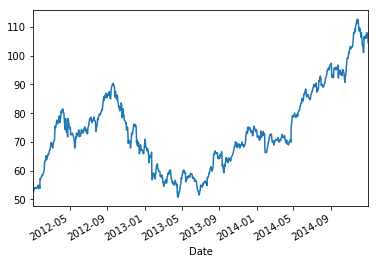

In [29]:
## Plotting time-series prices
close_px['AAPL'].plot();

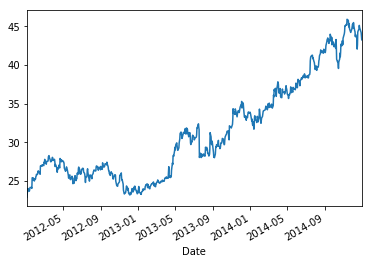

In [30]:
# plot the closing prices of MSFT
close_px['MSFT'].plot();

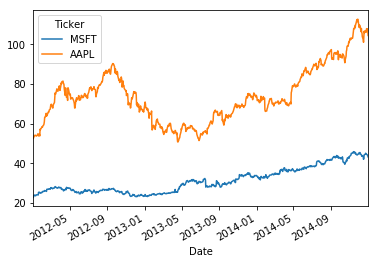

In [31]:
# plot MSFT vs AAPL on the same chart
close_px[['MSFT','AAPL']].plot();

## Plotting volume-series data

In [32]:
# pivot the volume data into columns
volumes = pivot_tickers_to_columns(raw,"Volume")
volumes.tail()

Ticker           AA      AAPL        GE      IBM      MSFT
Date                                                      
2014-12-24  2057400  14479600  17865100  1868100  11437800
2014-12-26  2644900  33721000  14978500  1912200  13197800
2014-12-29  2949500  27598900  20858200  3331800  14439500
2014-12-30  3854300  29881500  22184500  2829900  16384700
2014-12-31  3679600  41403400  28206500  4011900  21552500

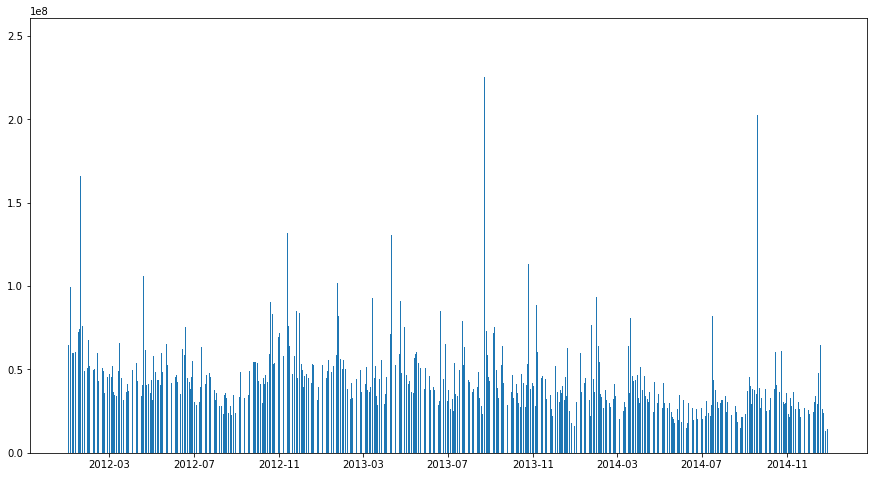

In [33]:
# plot the volume for MSFT
msftv = volumes[['MSFT']]
plt.bar(msftv.index,msftv["MSFT"])
plt.gcf().set_size_inches(15,8)

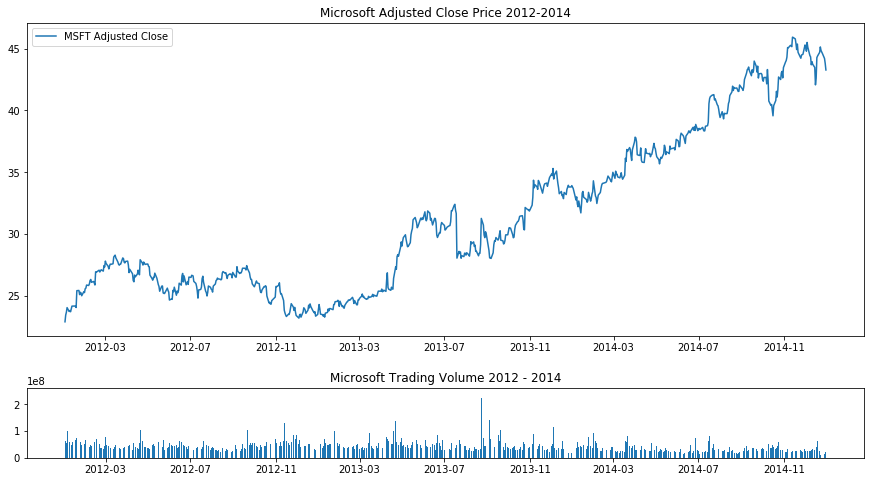

In [34]:
# draw the price history on the top
top = plt.subplot2grid((4,4),(0,0),rowspan=3,colspan=4)
top.plot(close_px['MSFT'].index,close_px['MSFT'],label='MSFT Adjusted Close')
plt.title('Microsoft Adjusted Close Price 2012-2014')
plt.legend(loc=2)

# and the volume along the botton
bottom = plt.subplot2grid((4,4),(3,0),rowspan=1,colspan=4)
bottom.bar(msftv.index,msftv['MSFT'])

plt.title('Microsoft Trading Volume 2012 - 2014')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

## Calculating the simple daily percentage change

The simple daily percentage change(without dividend and other factors) is the percentage change in value of a stock over a single day of trading. This can be easily calculated in pandas using .shift()

In [35]:
# calculate the daily percentage change
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

Ticker          AA    AAPL      GE     IBM    MSFT
Date                                              
2012-01-03     NaN     NaN     NaN     NaN     NaN
2012-01-04  0.0238  0.0054  0.0109 -0.0041  0.0235
2012-01-05 -0.0095  0.0111 -0.0005 -0.0047  0.0102
2012-01-06 -0.0214  0.0105  0.0054 -0.0115  0.0155
2012-01-09  0.0295 -0.0016  0.0113 -0.0052 -0.0132

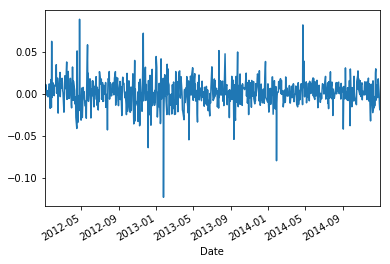

In [36]:
daily_pc['AAPL'].plot();

## Calculating simple daily cumulative returns

In [37]:
# calculate the daily cumulative return
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

Ticker          AA    AAPL      GE     IBM    MSFT
Date                                              
2012-01-03     NaN     NaN     NaN     NaN     NaN
2012-01-04  1.0238  1.0054  1.0109  0.9959  1.0235
2012-01-05  1.0141  1.0165  1.0103  0.9912  1.0340
2012-01-06  0.9924  1.0272  1.0158  0.9798  1.0501
2012-01-09  1.0217  1.0255  1.0272  0.9747  1.0362

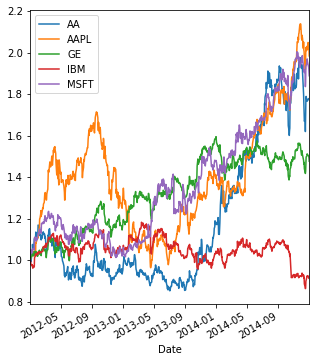

In [38]:
# plot all of the cumulative returns to get an idea
# of the relative performance of the stocks
daily_cr.plot(figsize=(5,6))
plt.legend(loc=2);

## Resampling data from daily to monthly returns

To calculate the monthly rate of return, we can use a little pandas magic and resample the original daily dates to throw out the days that are not an end of month value as well as forward filling anywhere there are missing values.

In [40]:
# resample to end of month and forward fill values
monthly = close_px.asfreq('M',method="ffill")
monthly[:5]

Ticker           AA     AAPL       GE       IBM     MSFT
Date                                                    
2012-01-31  22.9986  58.4577  16.2272  162.8986  25.2718
2012-02-29  23.0894  69.4659  16.6683  167.0397  27.3420
2012-03-31  22.7489  76.7795  17.5607  177.1607  27.7899
2012-04-30  22.0905  74.7856  17.1320  175.8276  27.5832
2012-05-31  19.4753  73.9852  16.7033  164.4738  25.3103

In [42]:
# calculate the monthly percentage changes
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

Ticker          AA    AAPL      GE     IBM    MSFT
Date                                              
2012-01-31     NaN     NaN     NaN     NaN     NaN
2012-02-29  0.0039  0.1883  0.0272  0.0254  0.0819
2012-03-31 -0.0147  0.1053  0.0535  0.0606  0.0164
2012-04-30 -0.0289 -0.0260 -0.0244 -0.0075 -0.0074
2012-05-31 -0.1184 -0.0107 -0.0250 -0.0646 -0.0824

In [43]:
# calculate the monthly cumulative return
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

Ticker          AA    AAPL      GE     IBM    MSFT
Date                                              
2012-01-31     NaN     NaN     NaN     NaN     NaN
2012-02-29  1.0039  1.1883  1.0272  1.0254  1.0819
2012-03-31  0.9891  1.3134  1.0822  1.0876  1.0996
2012-04-30  0.9605  1.2793  1.0558  1.0794  1.0915
2012-05-31  0.8468  1.2656  1.0293  1.0097  1.0015

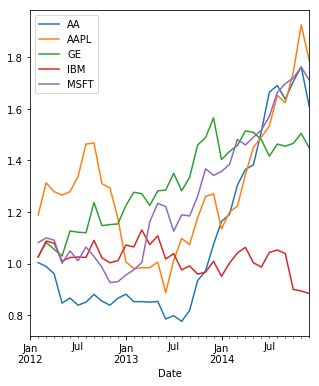

In [44]:
# plot the monthly cumulative returns
monthly_cr.plot(figsize=(5,6))
plt.legend(loc=2);

## Analysing distribution of returns
You can get a feel for the difference in distribution of the daily percentage changes for a particular stock ubu plotting that data in a historgram. A trick with generating histograms for data such as daily returns is to select the number fo bins to lump valuse into. We will use 50 bins which gives you a good feel for the distribution of daily changes across three years of data.

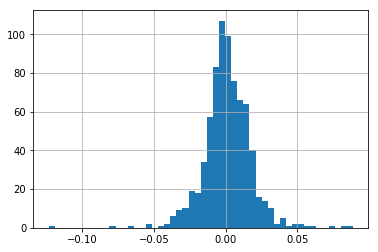

In [46]:
# histogram of the daily percentage for AAPL
aapl = daily_pc['AAPL']
aapl.hist(bins=50);

In [47]:
# descriptive statistics of the percentage changes
aapl.describe()

count    753.0000
mean       0.0011
std        0.0169
min       -0.1236
25%       -0.0074
50%        0.0005
75%        0.0110
max        0.0887
Name: AAPL, dtype: float64

A valuable conclusion to be drawn from this is the 95 percent coverage interval, which varies from -0.007476 to 0.010893. This states that over this 3-year period, the daily percent of change fit between these two percentages 95 percent of the time. This gives us a sense of the overall volatility in the stock. Technically, the close these values the less volatile the stock over that time.

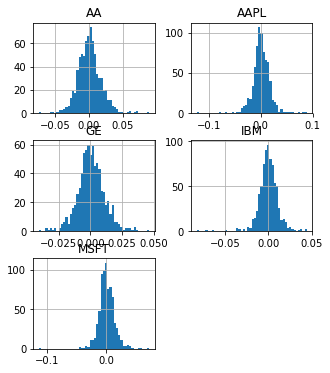

In [48]:
# matrix of all stocks daily percentage changes histograms
daily_pc.hist(bins=50,figsize=(5,6));

From this chart, we can very easily see the difference in performance of these nine stocks during this time, particularly the skewedness as well as easily being able to see the difference in the overall distribution at various confidence levels, thereby giving a quick view of which stocks have been more or less volatile.

## Performing a moving-average calculation
The moving average of a stock can be calculated using the pandas statistical package that is a part of pandas and is in the pd.stats namespace, specifically the .rolling_mean() function.

The moving average will give you a sense of the performance of a stock over a given time period by eliminating "noise" in the performance of the stock. The larger the moving window, the smoother and less random the graph will be - at the expense of the accuracy.

/Users/cnc/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  after removing the cwd from sys.path.
/Users/cnc/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=90,center=False).mean()
  """


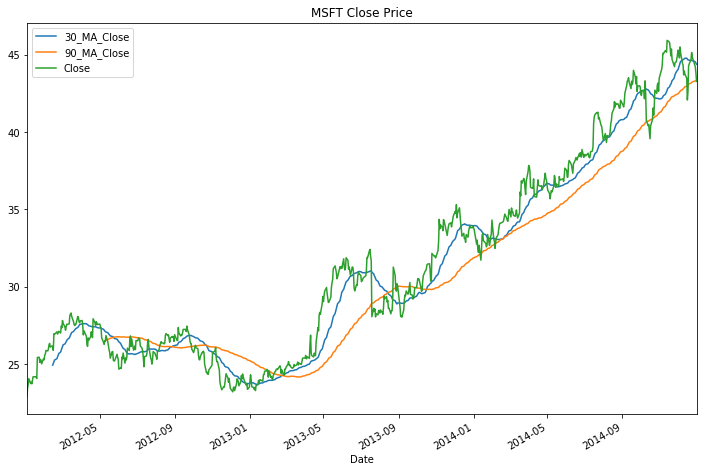

In [49]:
# extract just MSFT close
msft_close = close_px[['MSFT']]['MSFT']
# calculate the 30 and 90 day rolling means
ma_30 = pd.stats.moments.rolling_mean(msft_close,30)
ma_90 = pd.stats.moments.rolling_mean(msft_close,90)
# compose into a DataFrame that can be plotted
result = pd.DataFrame({'Close':msft_close,'30_MA_Close':ma_30,'90_MA_Close':ma_90})
# plot all series against each other
result.plot(title='MSFT Close Price')
plt.gcf().set_size_inches(12,8)

## Comparision of average daily returns across stocks

A scatter plot is a very effective means of being able to visually determine the relationship between the rates of change in stock prices between two stocks. 

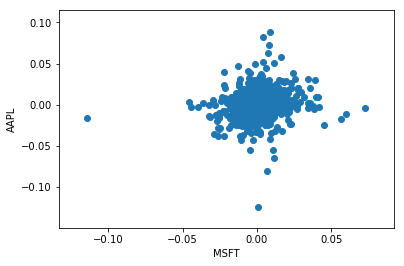

In [50]:
# plot the daily percentage change of MSFT vs AAPL
plt.scatter(daily_pc['MSFT'],daily_pc['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL');

What this gives us is a very quick view of the overall correlation of the daily returns between the two stocks. Each dot represents a single day for both stocks. Each dot is plotted along hte vertical based on the percentage change of AAPL along the horizontal for MSFT.

If for every amount that AAPL changed in value, MSFT also changed an identically proportional amount each day, then all the dots would fall along a vertical diagonal from the lower-left to upper-right section. In this case, the two variables would be perfectly correlated with a correlation value of 1.0. If the two variables were perfectly uncorrelated the correlation and hence the slope of the line would be 0, which is perfectly horizontal.

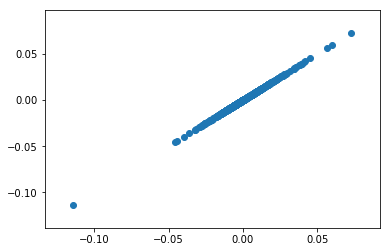

In [51]:
# demonstrate perfect correlation
plt.scatter(daily_pc['MSFT'],daily_pc['MSFT']);

Getting back to the plot of AAPL versus MSFT, excluding several outliers, this cluster appears to demonstrate a moderate correlation between the two stocks.

An actual regression actually shows the correlation to be 0.213 (the slope of the regression line). The regression line would be more toward horizontal rather than diagonal. This means that for any specific change in the price of AAPL, statistically we would more times than not, not be able to predict the change in price of MSFT on the given day from the price change in aPPL.

To facilitate the bulk analysis of multiple correlations, pandas provides the very useful scatter matrix graph, which will plot the scatters for all combinations of stocks. This plot gives a very easy means of eyeballing correlations between all of the combinations:

/Users/cnc/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


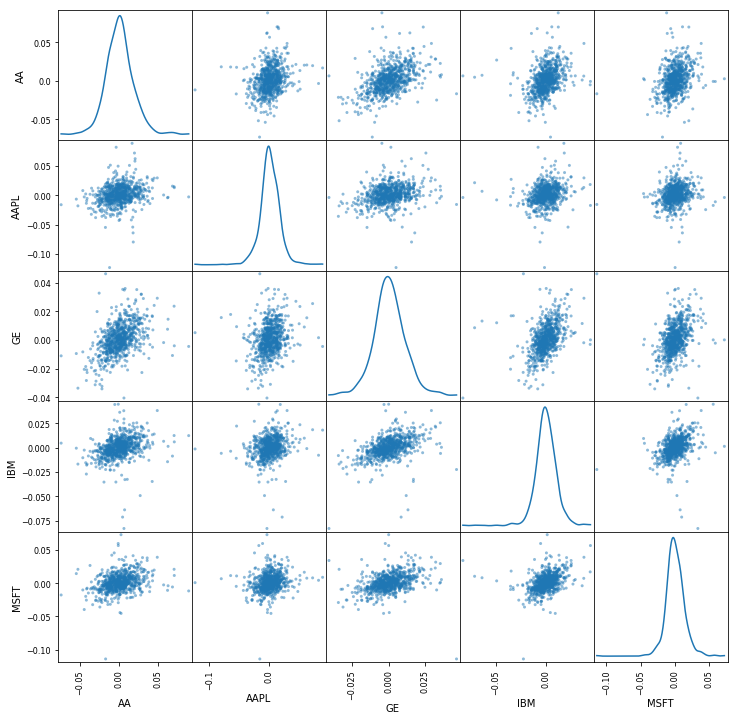

In [52]:
# plot the scatter of daily price changes for ALL stocks
pd.scatter_matrix(daily_pc,diagonal='kde',figsize=(12,12));

The diagonal in this plot is a kernel density estimation graph. If you refer to the section on using histograms to show the distribution of daily percentage changes for a single stock, this plot is essentially the same information, giving you a quick overview of how volatiole the different stocks are relative to each other. The narrower curves are less volatile than those that are wider, with the skew representing a tendency for greater returns or losses.

## Correlation of stocks based on daily percentage change of closing price
Correlation is a measure of strength of the association between two variables. A correlation coefficient of 1.0 means that every change in value in one set of data has a proportionate change in value to the other set of data. A 0.0 correlation means that the data sets have no relationship. The higher the correlation the more ability there is to predict a change in the other based on a change in the first.

The correlation between columns of data in DataFrame can be calculated very easily by simply calling it .corr() method. This will produce a matrix of all possible correlations between the variables represented by the values in all columns.

In [53]:
# calculate the correlation between all the stocks
# relative to daily percentage change
corrs = daily_pc.corr()
corrs

Ticker      AA    AAPL      GE     IBM    MSFT
Ticker                                        
AA      1.0000  0.2366  0.4605  0.3111  0.3103
AAPL    0.2366  1.0000  0.2408  0.2115  0.1879
GE      0.4605  0.2408  1.0000  0.4385  0.3459
IBM     0.3111  0.2115  0.4385  1.0000  0.3568
MSFT    0.3103  0.1879  0.3459  0.3568  1.0000

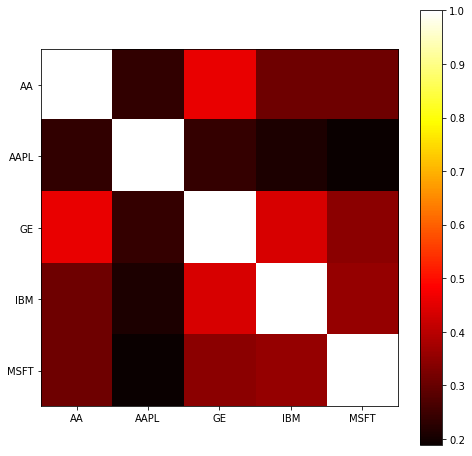

In [54]:
# plot a heatmap of the correlations
plt.imshow(corrs,cmap="hot",interpolation="none")
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns)
plt.yticks(range(len(corrs)),corrs.columns)
plt.gcf().set_size_inches(8,8)

The idea with this diagram is that you can see the level of correlation via color by finding the intersection of vertical and horizontal variables. The darker the color, the less the correlation; lighter the color the greater the correlation. The diagonal is necessarily white(1.0) as it is each stock compared to itself.

## Volatility Calculation

The volatility of a stock is a measurement of the amount change of variance in the price of a stock over a specific period of time. It is common to compare the volatility of another stock to get a feel for which may have less risk or to a market index to compare the stock's volatility to the overall market. Generally, the higher the volatility, the riskier the investment in that stock.

Volatility is calculated by taking a rolling-window standard deviation on percentage change in a stock(and scaling it relative to the size of the window). The size of the window affects the overall result. The wider a window, the less representative the measurement will become. As the window narrows, the result approaches the standard deviation. So, it is a bit of an art to pick the proper window size based on the data sampling frequency. Fortunately, pandas makes this very easy to modify interactively.

/Users/cnc/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=75,center=False).std()
  after removing the cwd from sys.path.


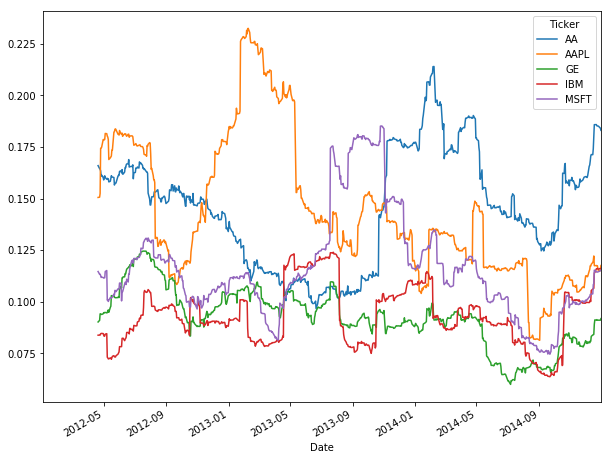

In [55]:
# 75 period minimum
min_periods = 75
# calculate the volatility
vol = pd.stats.moments.rolling_std(daily_pc,min_periods) * np.sqrt(min_periods)
# plot it
vol.plot(figsize=(10,8));

Lines higher on the chart represent overall higher volatility and the change of volatility over the time is shown.

## Determining risk relative to expected returns
A useful analysis is to related the volatility of a stock's daily percentage change to its expected return. This gives a feel for the risk/return ration of the investment. This can be performed by mapping the mean of the daily percentage change relative to the standard deviation of the same values.

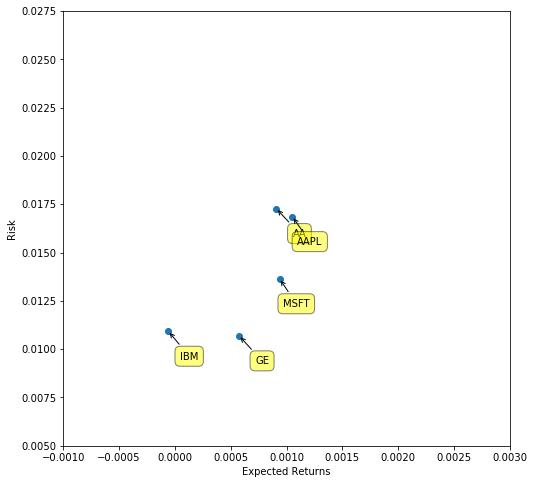

In [57]:
# generate a scatter of the mean versus std of daily % change
plt.scatter(daily_pc.mean(),daily_pc.std())
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

# this adds fancy labels to each dot, with an arrow too
for label, x, y in zip(daily_pc.columns, daily_pc.mean(), daily_pc.std()):
    plt.annotate(label,xy=(x,y),xytext=(30,-30),textcoords = 'offset points', ha='right', va='bottom',
                bbox=dict(boxstyle='round,pad=0.5',fc='yellow',alpha=0.5), 
                 arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=0'))
    
# set ranges and scales for good presentation
plt.xlim(-0.001,0.003)
plt.ylim(0.005,0.0275)
# set size
plt.gcf().set_size_inches(8,8);

The results of this immediately jump out from the visualization and may have been more difficult to see by just looking at tables of numbers:
* Airline stocks (AA,DAL,UAL) have the highest risk but also have the highest returns
* Tech stocks are of medium risk but also have the medium return
* Among the tech stocks IBM and GE are the conservative of the four.
* Cola stocks have the lowest risk but are also the lowest returns as a group. This makes sense for a high-volume commodity.